In [1]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt


In [12]:

winners = pd.read_csv('three_data/winners.csv')
losers = pd.read_csv('three_data/losers.csv')

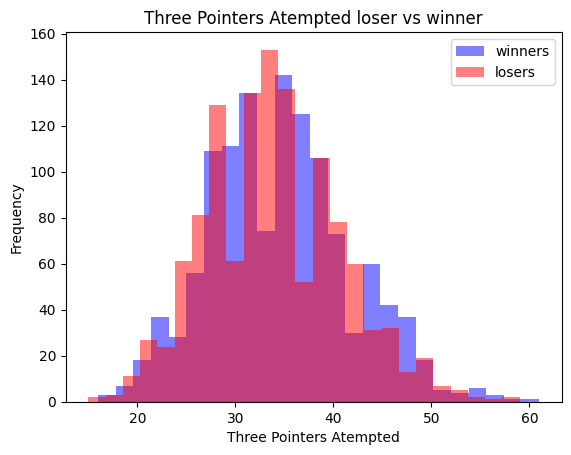

In [22]:




plt.hist(winners['FG3A'],bins=25,alpha=0.5,label='winners',color='blue')
plt.hist(losers['FG3A'],bins=25,alpha=0.5,label='losers',color='red')

plt.xlabel('Three Pointers Atempted')
plt.ylabel('Frequency')
plt.title('Three Pointers Atempted loser vs winner')
plt.legend()

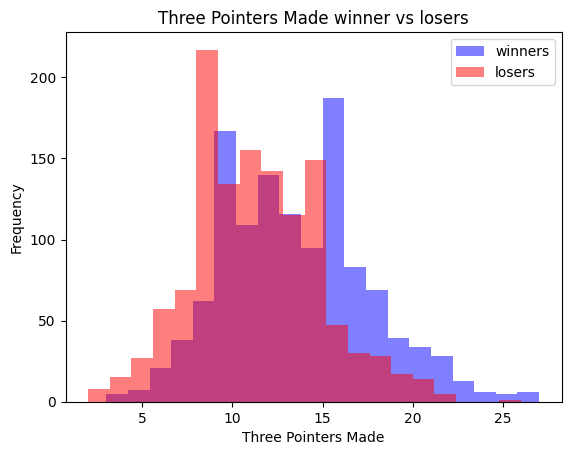

In [21]:
plt.hist(winners['FG3'],bins=20,alpha=0.5,label='winners',color='blue')
plt.hist(losers['FG3'],bins=20,alpha=0.5,label='losers',color='red')
plt.xlabel('Three Pointers Made')
plt.ylabel('Frequency')
plt.title('Three Pointers Made winner vs losers')
plt.legend()

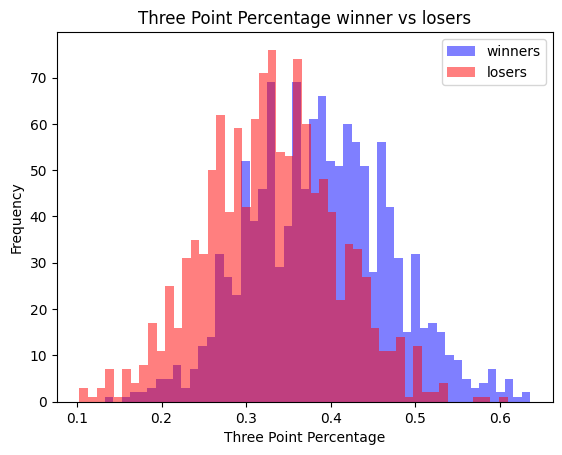

In [19]:
plt.hist(winners['FG3_PCT'],bins=50,alpha=0.5,label='winners',color='blue')
plt.hist(losers['FG3_PCT'],bins=50,alpha=0.5,label='losers',color='red')
plt.xlabel('Three Point Percentage')
plt.ylabel('Frequency')
plt.title('Three Point Percentage winner vs losers')
plt.legend()

In [6]:


# FILEPATH: /Users/san/cmpt353/project/anayalsis.ipynb
pvalue_winners_three_attempted = stats.normaltest(winners['FG3A']).pvalue
pvalue_losers_three_attempted = stats.normaltest(losers['FG3A']).pvalue
pvalue_winners_three_made = stats.normaltest(winners['FG3']).pvalue
pvalue_losers_three_made = stats.normaltest(losers['FG3']).pvalue

pvalue_winners_three_percentage = stats.normaltest(winners['FG3_PCT']).pvalue
pvalue_losers_three_percentage = stats.normaltest(losers['FG3_PCT']).pvalue




variance_pvalue_three_attempted = stats.levene(winners['FG3A'], losers['FG3A']).pvalue
variance_pvalue_three_made = stats.levene(winners['FG3'], losers['FG3']).pvalue
variance_pvalue_three_percentage = stats.levene(winners['FG3_PCT'], losers['FG3_PCT']).pvalue   




table_data = [
    ["normal test winner three attempted", pvalue_winners_three_attempted],
    ["normal test losser three attempted", pvalue_losers_three_attempted],
    ["normal test winner three made", pvalue_winners_three_made],
    ["normal test winner three made", pvalue_losers_three_made],
    ["normal test winner three percentage", pvalue_winners_three_percentage],
    ["normal test loser three percentage", pvalue_losers_three_percentage],
    ["variance pvalue three atempted", variance_pvalue_three_attempted],
    ["variance pvalue three made", variance_pvalue_three_made],
    ["variance pvalue three percentage", variance_pvalue_three_percentage]
]

table = pd.DataFrame(table_data, columns=["Description", "P-Value"])
print(table)


                           Description       P-Value
0   normal test winner three attempted  1.229954e-05
1   normal test losser three attempted  2.931595e-05
2        normal test winner three made  7.419064e-07
3        normal test winner three made  1.306683e-06
4  normal test winner three percentage  2.522968e-01
5   normal test loser three percentage  8.922452e-01
6       variance pvalue three atempted  2.336269e-01
7           variance pvalue three made  1.458990e-07
8     variance pvalue three percentage  3.917788e-02


Since the the three pointed atempeted and three point made data is not normal or have equal variance we cant do 
the t-test to determine if winners atempted or made more threes then the losers

In [23]:
#Mann-Whitney U Test



print(stats.mannwhitneyu(winners['FG3A'], losers['FG3A'], alternative='two-sided'), "3 atemqpted")
print(stats.mannwhitneyu(winners['FG3'], losers['FG3'], alternative='two-sided'), "3 made")
print(stats.mannwhitneyu(winners['FG3_PCT'], losers['FG3_PCT'], alternative='two-sided'), "3 percentage")




MannwhitneyuResult(statistic=787909.5, pvalue=0.07382082388777118) 3 atemqpted
MannwhitneyuResult(statistic=994333.5, pvalue=8.176432012890112e-42) 3 made
MannwhitneyuResult(statistic=1054965.0, pvalue=1.9586632535384025e-64) 3 percentage


the three point atempted and percentenge differ for
three point made , three point percentage. Knowing the three point data visually i know winners have greater three pointers

In [8]:
#compare winner to loser three point made

three_made_winner=winners['FG3']
three_made_loser=losers['FG3']

winner_has_more_three_made = 0
loser_has_more_three_made = 0
both_have_same_three_made = 0
for winner, loser in zip(three_made_winner, three_made_loser):
    if winner > loser:
        winner_has_more_three_made += 1
    elif winner < loser:
        loser_has_more_three_made += 1
    else:
        both_have_same_three_made += 1

print("winner has more three made: ", winner_has_more_three_made)
print("loser has more three made: ", loser_has_more_three_made)
print("both have same three made: ", both_have_same_three_made)

winner has more three made:  767
loser has more three made:  380
both have same three made:  83


In [9]:
three_attempted_winner=winners['FG3A']
three_attempted_loser=losers['FG3A']

winner_has_more_atempt = 0
loser_has_more_atempt = 0
both_have_same_atempt = 0
for winner, loser in zip(three_attempted_winner, three_attempted_loser):
    if winner > loser:
        winner_has_more_atempt += 1
    elif winner < loser:
        loser_has_more_atempt += 1
    else:
        both_have_same_atempt += 1

print("winner has more three attempted: ", winner_has_more_atempt)
print("loser has more three attempted: ", loser_has_more_atempt)
print("both have same three attempted: ", both_have_same_atempt)

winner has more three attempted:  611
loser has more three attempted:  566
both have same three attempted:  53
